In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

import seaborn as sns

from datetime import datetime, timedelta

In [2]:
building3 = pd.read_csv('building3.csv')

In [3]:
building3['timestamp'] = pd.to_datetime(building3['timestamp'])

In [4]:
assert(building3['building_number'].unique() == [3])

In [5]:
building3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26400 entries, 0 to 26399
Data columns (total 5 columns):
timestamp          26400 non-null datetime64[ns]
main_meter         26400 non-null float64
sub_meter_1        26400 non-null float64
sub_meter_2        26400 non-null float64
building_number    26400 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.0 MB


In [6]:
building3.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number
0,2017-04-01 00:00:00,2663.181130,2359.451392,26.532342,3
1,2017-04-01 00:15:00,2366.406016,1992.106181,33.114303,3
2,2017-04-01 00:30:00,2482.173662,2104.718668,22.985089,3
3,2017-04-01 00:45:00,2479.055295,2155.859300,18.943633,3
4,2017-04-01 01:00:00,2415.018900,2072.522322,26.796459,3


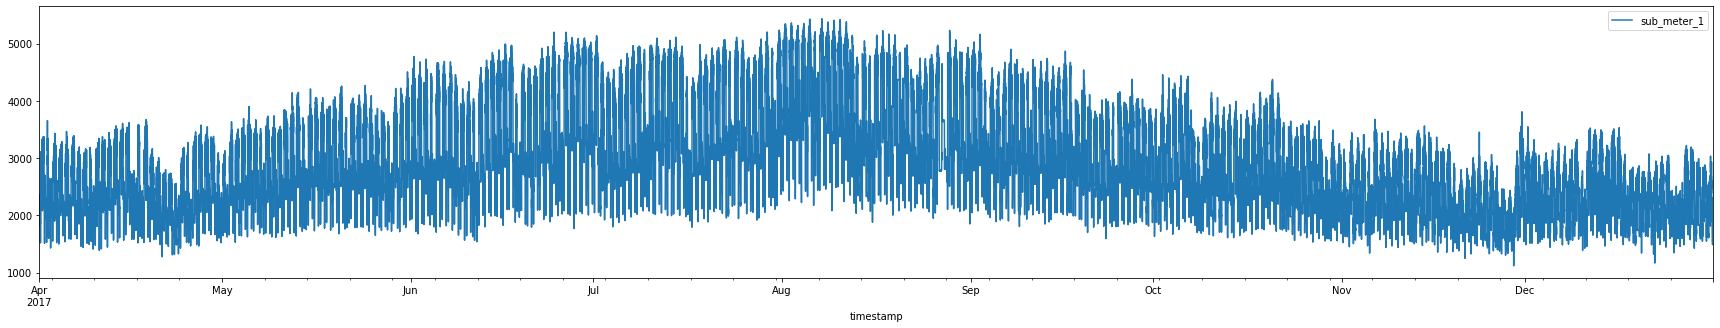

In [7]:
building3.plot(x='timestamp', y='sub_meter_1', figsize=(30, 5))

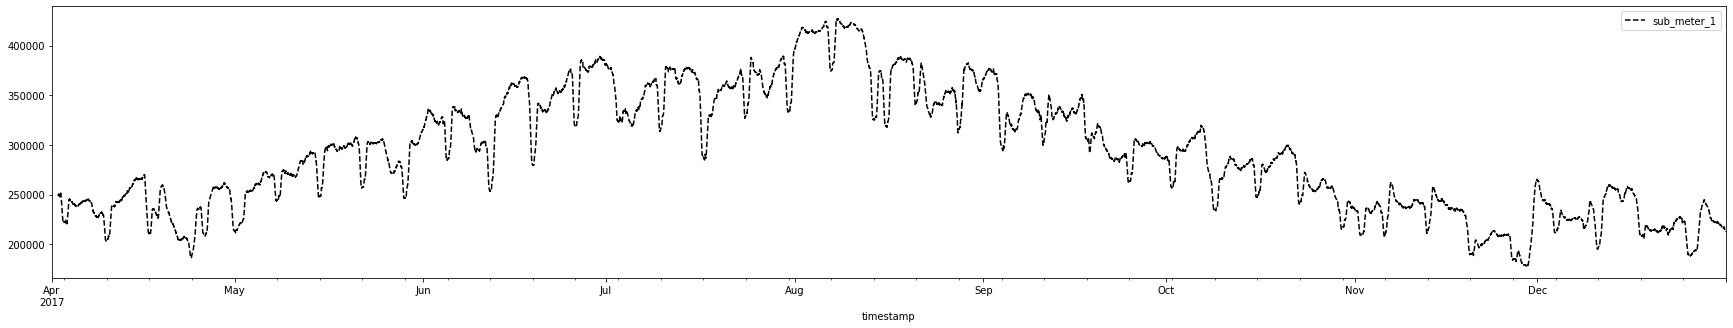

In [8]:
window = 96
building3[['timestamp', 'sub_meter_1']].rolling(window, win_type=None, on='timestamp').sum().plot(x='timestamp', y='sub_meter_1', figsize=(30, 5), style='k--')

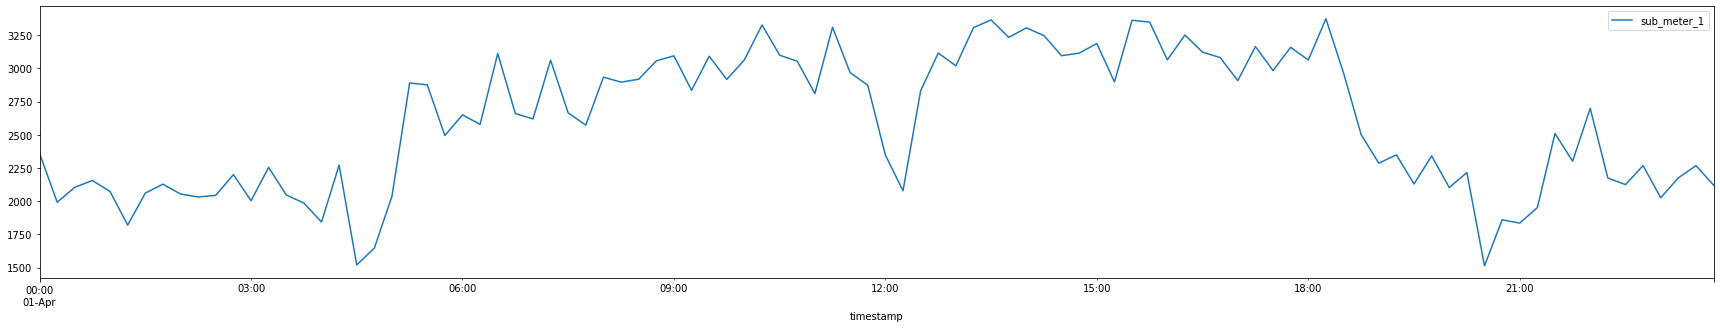

In [9]:
building3.iloc[:96].plot(x='timestamp', y='sub_meter_1', figsize=(30, 5))

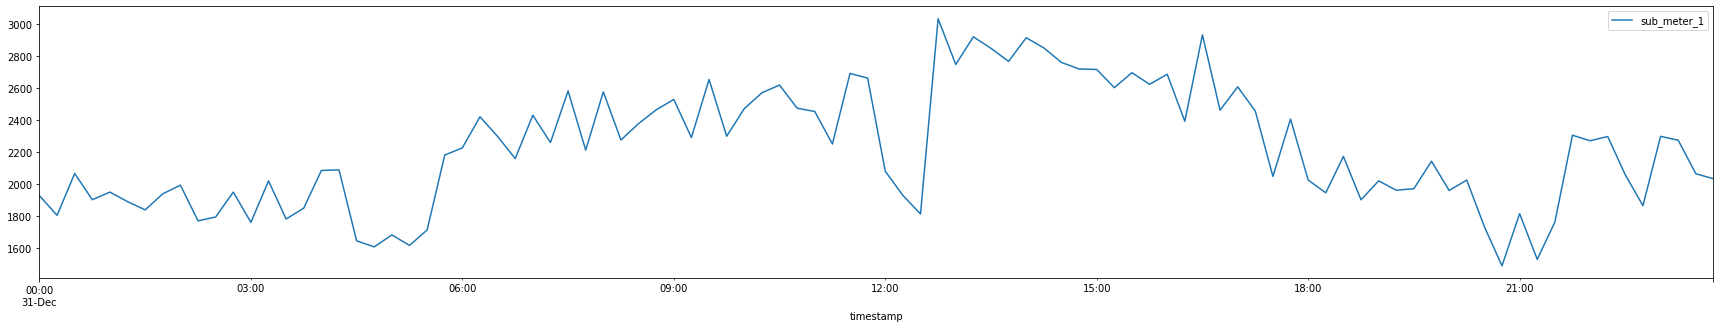

In [10]:
building3.iloc[-96:].plot(x='timestamp', y='sub_meter_1', figsize=(30, 5))

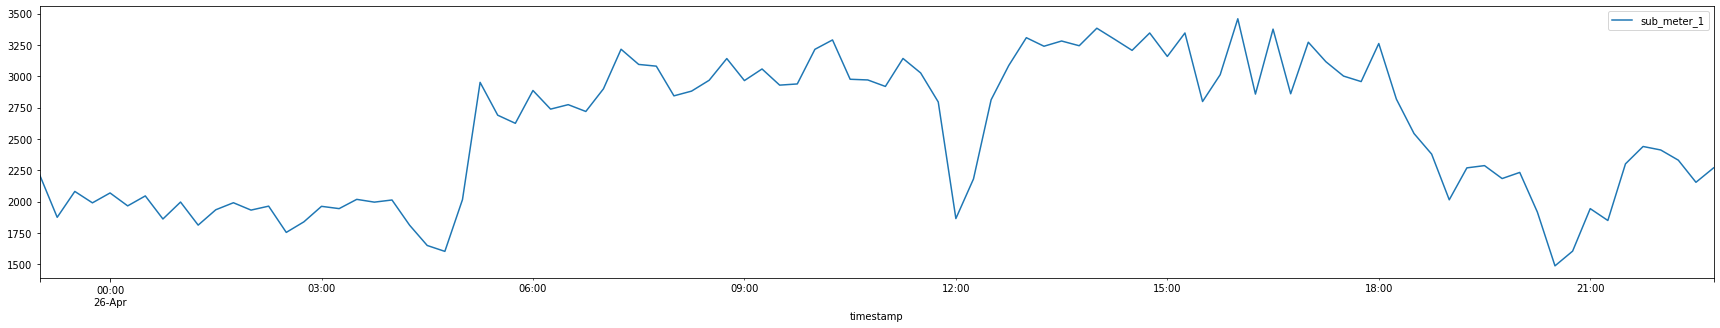

In [11]:
building3.iloc[2396:(2396+96)].plot(x='timestamp', y='sub_meter_1', figsize=(30, 5))

In [12]:
day_wise_building3_sub_meter_1 = building3[['timestamp', 'sub_meter_1']].rolling(window, win_type=None, on='timestamp').sum().iloc[95::96, :].reset_index(drop=True)
day_wise_building3_sub_meter_1['timestamp'] = day_wise_building3_sub_meter_1['timestamp'].apply(lambda x : x.date())
day_wise_building3_sub_meter_1.head()

,timestamp,sub_meter_1
0,2017-04-01,249833.566482
1,2017-04-02,222061.034056
2,2017-04-03,244635.139140
3,2017-04-04,238407.092988
4,2017-04-05,242290.231537


In [13]:
day_wise_building3_sub_meter_1.shape

(275, 2)

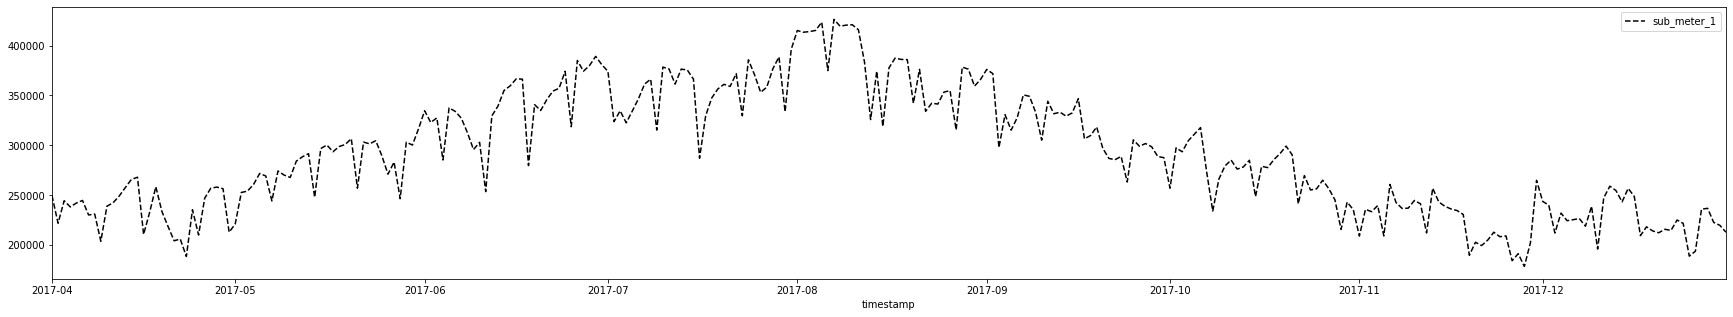

In [14]:
day_wise_building3_sub_meter_1.plot(x='timestamp', y='sub_meter_1', style='k--', figsize=(30, 5))

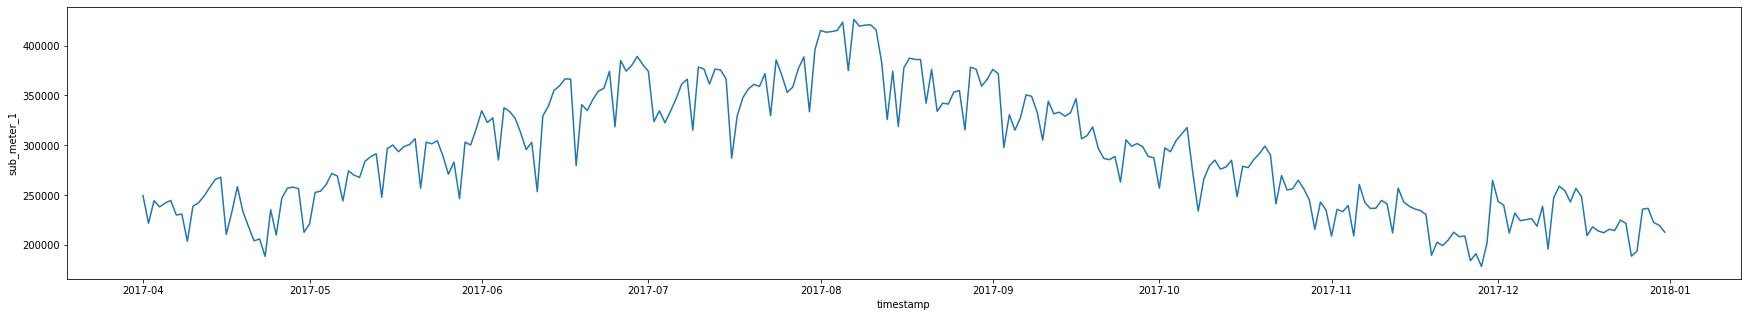

In [15]:
plt.figure(figsize=(30, 5))
sns.lineplot(data = day_wise_building3_sub_meter_1, x='timestamp', y='sub_meter_1')

### Adding all 96 data of a day as individual 96 columns

In [16]:
assert(np.array_equal(building3['sub_meter_1'].values.reshape(-1, 96)[0], building3.loc[:95, 'sub_meter_1'].values))

In [17]:
day_wise_building3_sub_meter_1 = pd.concat([day_wise_building3_sub_meter_1, pd.DataFrame(building3['sub_meter_1'].values.reshape(-1, 96))], axis=1)

In [18]:
day_wise_building3_sub_meter_1.head()

,timestamp,sub_meter_1,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,249833.566482,2359.451392,1992.106181,2104.718668,2155.859300,2072.522322,1819.566435,2060.629139,2127.949738,...,2509.707879,2301.387792,2699.542834,2174.080709,2125.076207,2267.758404,2025.787464,2175.832452,2267.839551,2120.686674
1,2017-04-02,222061.034056,2204.703692,2017.395607,2265.336744,2030.157202,2058.874650,2147.574623,1931.275122,2066.169913,...,2502.969203,2191.873642,2472.633753,2309.321388,2097.774263,1978.611225,2643.318448,2320.724329,2255.498762,2011.339370
2,2017-04-03,244635.139140,2429.259894,2189.466573,2295.218498,1993.408891,2110.792986,2109.900988,2078.519215,2130.120983,...,2320.077928,2273.397126,2610.928124,2159.330663,2155.108988,2127.581177,2214.503683,2123.914978,1981.429000,2286.051640
3,2017-04-04,238407.092988,2084.720103,2001.921160,2160.268457,1865.632590,2152.436608,2066.059599,1999.435522,2122.174166,...,2298.845523,2293.564241,2356.792976,2132.531659,2087.425732,2040.504943,2253.849509,2026.975572,2190.484460,1945.332195
4,2017-04-05,242290.231537,2133.529753,2066.887221,2069.398058,2053.820132,1955.900646,1801.756884,1978.949841,2025.811225,...,2277.120068,2230.603708,2348.130911,2055.299594,1910.981371,2275.685782,2360.508730,2266.724295,2160.024829,2178.178369


### Adding `is_weekend` column

In [19]:
day_wise_building3_sub_meter_1.insert(1, 'is_weekend', day_wise_building3_sub_meter_1['timestamp'].apply(lambda x : x.weekday()>=5).astype(int))
day_wise_building3_sub_meter_1.head()

,timestamp,is_weekend,sub_meter_1,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,249833.566482,2359.451392,1992.106181,2104.718668,2155.859300,2072.522322,1819.566435,2060.629139,...,2509.707879,2301.387792,2699.542834,2174.080709,2125.076207,2267.758404,2025.787464,2175.832452,2267.839551,2120.686674
1,2017-04-02,1,222061.034056,2204.703692,2017.395607,2265.336744,2030.157202,2058.874650,2147.574623,1931.275122,...,2502.969203,2191.873642,2472.633753,2309.321388,2097.774263,1978.611225,2643.318448,2320.724329,2255.498762,2011.339370
2,2017-04-03,0,244635.139140,2429.259894,2189.466573,2295.218498,1993.408891,2110.792986,2109.900988,2078.519215,...,2320.077928,2273.397126,2610.928124,2159.330663,2155.108988,2127.581177,2214.503683,2123.914978,1981.429000,2286.051640
3,2017-04-04,0,238407.092988,2084.720103,2001.921160,2160.268457,1865.632590,2152.436608,2066.059599,1999.435522,...,2298.845523,2293.564241,2356.792976,2132.531659,2087.425732,2040.504943,2253.849509,2026.975572,2190.484460,1945.332195
4,2017-04-05,0,242290.231537,2133.529753,2066.887221,2069.398058,2053.820132,1955.900646,1801.756884,1978.949841,...,2277.120068,2230.603708,2348.130911,2055.299594,1910.981371,2275.685782,2360.508730,2266.724295,2160.024829,2178.178369


### Getting separate lineplot for weekend and weekday

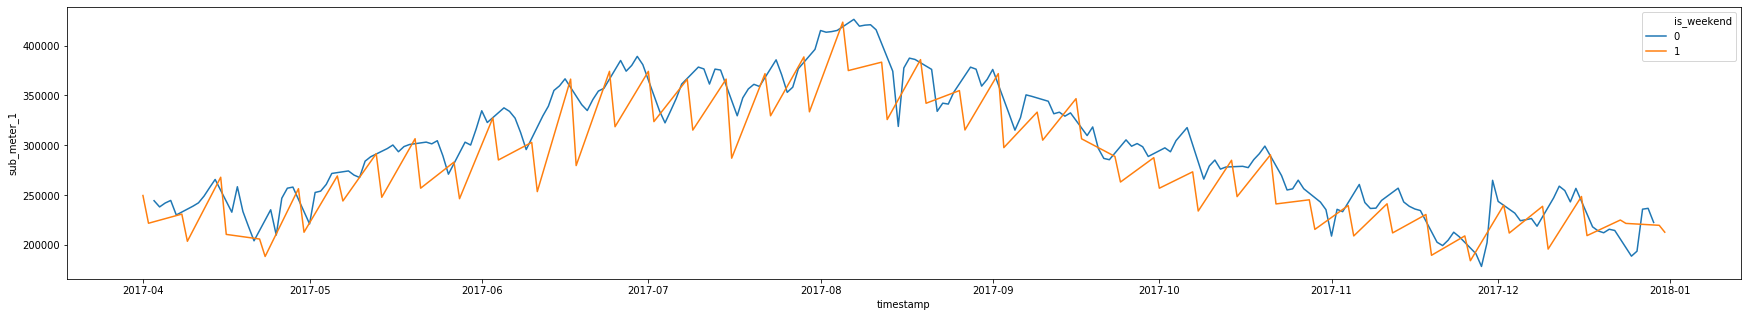

In [20]:
plt.figure(figsize=(30, 5))
ax = sns.lineplot(data = day_wise_building3_sub_meter_1, x='timestamp', y='sub_meter_1', hue='is_weekend')

(736420.0, 736694.0)

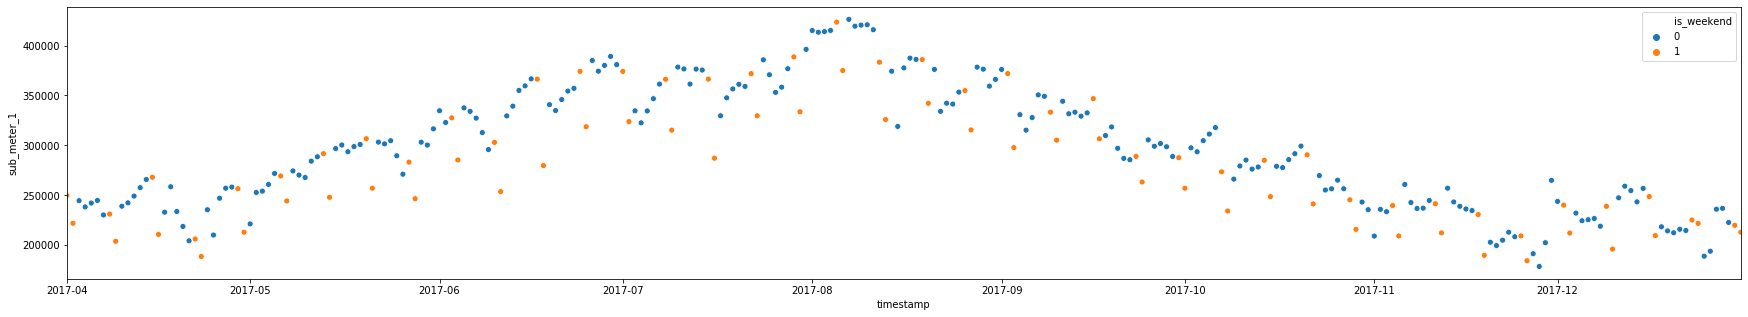

In [21]:
plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = day_wise_building3_sub_meter_1, x='timestamp', y='sub_meter_1', hue='is_weekend')
ax.set_xlim(day_wise_building3_sub_meter_1['timestamp'].min(), day_wise_building3_sub_meter_1['timestamp'].max())

In [22]:
day_wise_building3_sub_meter_1.loc[day_wise_building3_sub_meter_1.is_weekend == 1, 'sub_meter_1'].sum()

22308124.40979517

In [23]:
day_wise_building3_sub_meter_1.loc[day_wise_building3_sub_meter_1.is_weekend == 0, 'sub_meter_1'].sum()

58002432.08935413

In [24]:
def plot_custom_line_plots(data, col, label_column):
    """
    According to given labels column, change color of same line
    NOTE: For now considered label_column to be binary
    """
    
    cmap = ListedColormap(colors=['b', 'r'])
    norm = BoundaryNorm()
    
    points = data.loc[data[label_column] == 1, col].values
    segements = []

In [25]:
t = np.linspace(0, 10, 200)
x = np.cos(np.pi * t)
y = np.sin(t)

In [26]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [27]:
x.shape

(200,)

In [28]:
y.shape

(200,)

In [29]:
points[:5]

array([[[1.        , 0.        ]],

       [[0.98756455, 0.05023011]],

       [[0.95056749, 0.10033341]],

       [[0.88992896, 0.15018339]],

       [[0.8071571 , 0.19965422]]])

## FINDING SHARP CHANGE POINTS

(736619.0, 736627.0)

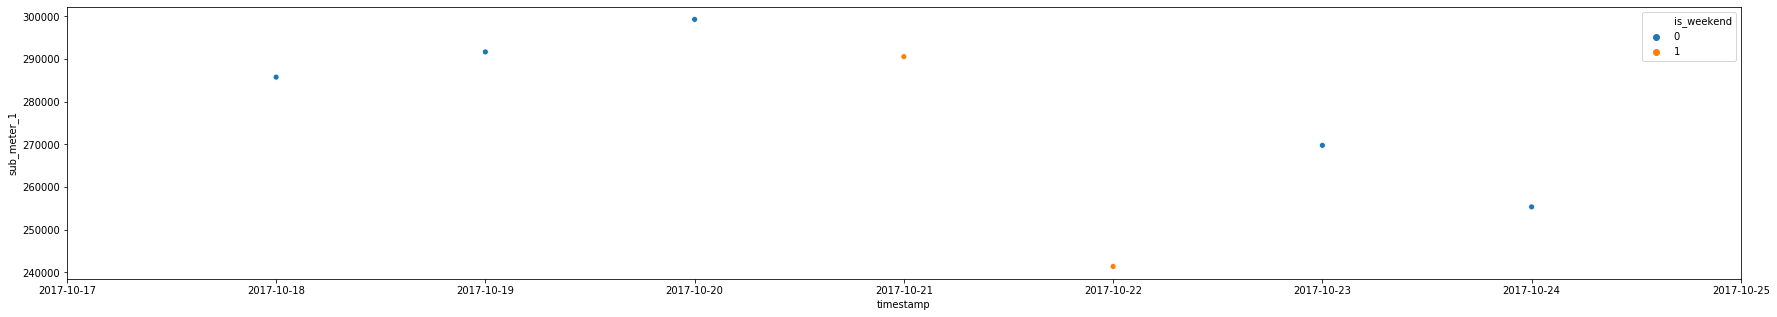

In [30]:
data = day_wise_building3_sub_meter_1.iloc[200:207]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_1', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

### Checking behaviour around national holidays

(736549.0, 736563.0)

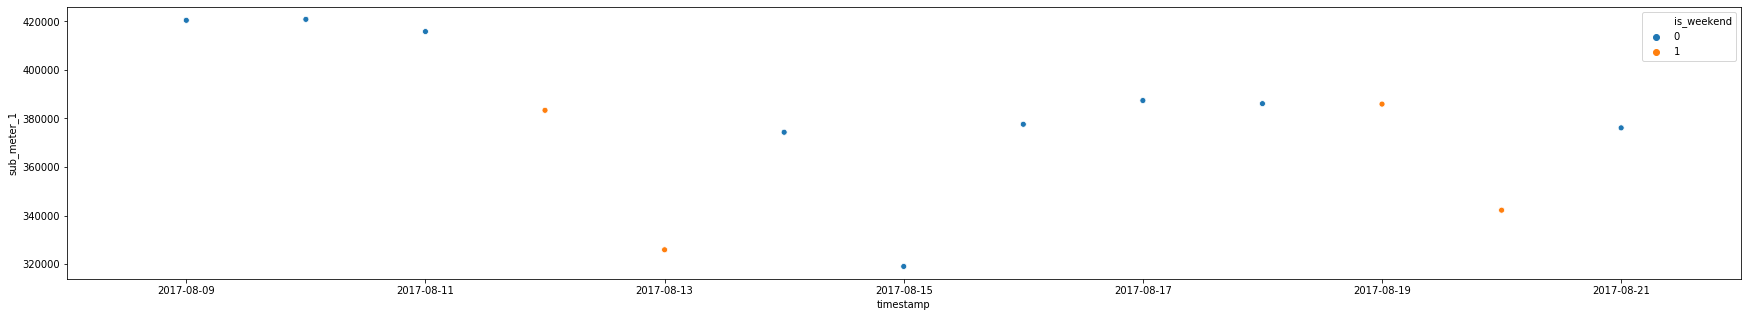

In [31]:
data = day_wise_building3_sub_meter_1.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_1', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

(736549.0, 736563.0)

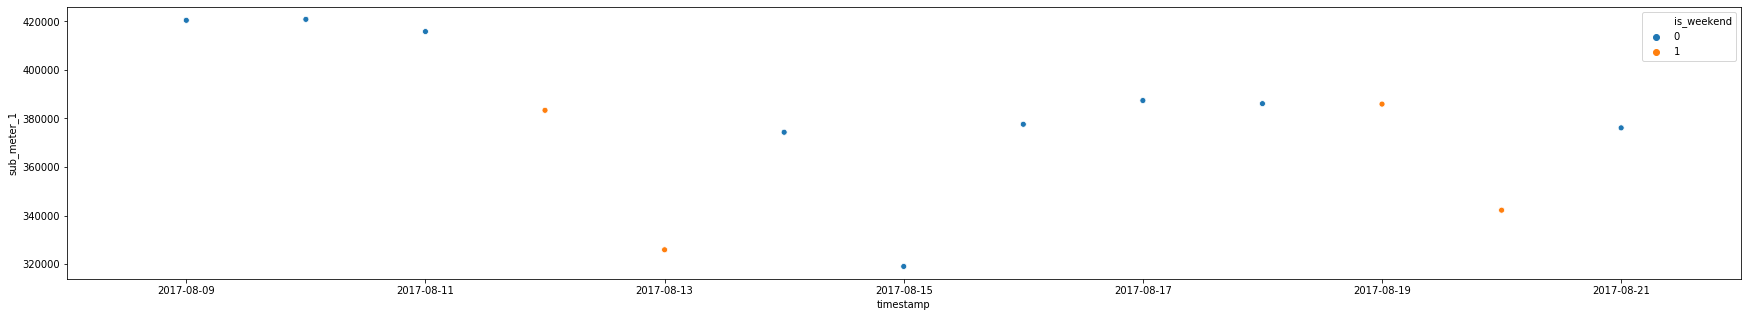

In [32]:
data = day_wise_building3_sub_meter_1.iloc[130:143]

plt.figure(figsize=(30, 5))
ax = sns.scatterplot(data = data, x='timestamp', y='sub_meter_1', hue='is_weekend')
ax.set_xlim(data['timestamp'].min() - timedelta(days=1), data['timestamp'].max() + timedelta(days=1))

In [33]:
day_wise_building3_sub_meter_1.head()

,timestamp,is_weekend,sub_meter_1,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,249833.566482,2359.451392,1992.106181,2104.718668,2155.859300,2072.522322,1819.566435,2060.629139,...,2509.707879,2301.387792,2699.542834,2174.080709,2125.076207,2267.758404,2025.787464,2175.832452,2267.839551,2120.686674
1,2017-04-02,1,222061.034056,2204.703692,2017.395607,2265.336744,2030.157202,2058.874650,2147.574623,1931.275122,...,2502.969203,2191.873642,2472.633753,2309.321388,2097.774263,1978.611225,2643.318448,2320.724329,2255.498762,2011.339370
2,2017-04-03,0,244635.139140,2429.259894,2189.466573,2295.218498,1993.408891,2110.792986,2109.900988,2078.519215,...,2320.077928,2273.397126,2610.928124,2159.330663,2155.108988,2127.581177,2214.503683,2123.914978,1981.429000,2286.051640
3,2017-04-04,0,238407.092988,2084.720103,2001.921160,2160.268457,1865.632590,2152.436608,2066.059599,1999.435522,...,2298.845523,2293.564241,2356.792976,2132.531659,2087.425732,2040.504943,2253.849509,2026.975572,2190.484460,1945.332195
4,2017-04-05,0,242290.231537,2133.529753,2066.887221,2069.398058,2053.820132,1955.900646,1801.756884,1978.949841,...,2277.120068,2230.603708,2348.130911,2055.299594,1910.981371,2275.685782,2360.508730,2266.724295,2160.024829,2178.178369


### Inserting `sub_meter_1_diff` as a column

In [34]:
sub_meter_1_diff = day_wise_building3_sub_meter_1['sub_meter_1'] - day_wise_building3_sub_meter_1['sub_meter_1'].shift(periods=1)
day_wise_building3_sub_meter_1.insert(3, 'sub_meter_1_diff', sub_meter_1_diff)
day_wise_building3_sub_meter_1.head()

,timestamp,is_weekend,sub_meter_1,sub_meter_1_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,2017-04-01,1,249833.566482,NaN,2359.451392,1992.106181,2104.718668,2155.859300,2072.522322,1819.566435,...,2509.707879,2301.387792,2699.542834,2174.080709,2125.076207,2267.758404,2025.787464,2175.832452,2267.839551,2120.686674
1,2017-04-02,1,222061.034056,-27772.532426,2204.703692,2017.395607,2265.336744,2030.157202,2058.874650,2147.574623,...,2502.969203,2191.873642,2472.633753,2309.321388,2097.774263,1978.611225,2643.318448,2320.724329,2255.498762,2011.339370
2,2017-04-03,0,244635.139140,22574.105084,2429.259894,2189.466573,2295.218498,1993.408891,2110.792986,2109.900988,...,2320.077928,2273.397126,2610.928124,2159.330663,2155.108988,2127.581177,2214.503683,2123.914978,1981.429000,2286.051640
3,2017-04-04,0,238407.092988,-6228.046152,2084.720103,2001.921160,2160.268457,1865.632590,2152.436608,2066.059599,...,2298.845523,2293.564241,2356.792976,2132.531659,2087.425732,2040.504943,2253.849509,2026.975572,2190.484460,1945.332195
4,2017-04-05,0,242290.231537,3883.138549,2133.529753,2066.887221,2069.398058,2053.820132,1955.900646,1801.756884,...,2277.120068,2230.603708,2348.130911,2055.299594,1910.981371,2275.685782,2360.508730,2266.724295,2160.024829,2178.178369


## FOR DECLINE POINTS

## TODO
- Find Suitable `value_for_decline`

In [35]:
def get_decline_dates(data, shift=1, value_for_decline=-500):
    timestamps_with_decline = data[(data['sub_meter_1'] - data['sub_meter_1'].shift(periods=shift)) <= value_for_decline].timestamp
    return timestamps_with_decline, timestamps_with_decline.apply(lambda data : data.weekday())

In [36]:
timestamps_with_decline, weekdays_with_decline = get_decline_dates(day_wise_building3_sub_meter_1, shift=1, value_for_decline=-400)

In [37]:
timestamps_with_decline.shape

(130,)

In [38]:
weekdays_with_decline.value_counts()

6    40
1    28
4    21
5    16
2    14
3    10
0     1
Name: timestamp, dtype: int64

In [39]:
pd.set_option('display.max_rows', 70)

In [40]:
day_wise_building3_sub_meter_1.iloc[-2:]

,timestamp,is_weekend,sub_meter_1,sub_meter_1_diff,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
273,2017-12-30,1,219988.499377,-2861.557539,1999.336232,2154.760952,1740.33607,2251.566430,1789.774385,1945.912694,...,1677.773348,2537.561736,2354.697349,2169.102076,2126.111694,1779.166548,1986.771820,1963.612522,2024.757582,1996.580254
274,2017-12-31,1,213089.643571,-6898.855807,1927.671456,1804.221909,2066.54443,1902.146906,1949.698539,1890.162149,...,1761.593140,2306.234984,2271.378001,2297.967683,2057.221414,1864.799210,2298.911915,2274.872211,2064.895508,2033.418941


In [41]:
building3_decline_df = pd.concat([
                            timestamps_with_decline,
                            weekdays_with_decline,
                            day_wise_building3_sub_meter_1.loc[timestamps_with_decline.index, 'sub_meter_1_diff']], axis=1, ignore_index=True)
building3_decline_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'sub_meter_1_diff'}, inplace=True)
building3_decline_df.sort_values(by='timestamp', ascending=True)

,timestamp,weekday,sub_meter_1_diff
1,2017-04-02,6,-27772.532426
3,2017-04-04,1,-6228.046152
6,2017-04-07,4,-14559.309555
8,2017-04-09,6,-27231.323436
15,2017-04-16,6,-57243.227429
...,...,...,...
267,2017-12-24,6,-3390.687578
268,2017-12-25,0,-32800.651895
272,2017-12-29,4,-14143.040344
273,2017-12-30,5,-2861.557539


In [42]:
print('Num of Sunday : ', (building3_decline_df.weekday == 6).sum())

Num of Sunday :  40


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [43]:
building3_decline_df[building3_decline_df.weekday != 6].sort_values(by='timestamp')

,timestamp,weekday,sub_meter_1_diff
3,2017-04-04,1,-6228.046152
6,2017-04-07,4,-14559.309555
18,2017-04-19,2,-24788.863008
19,2017-04-20,3,-14977.492878
20,2017-04-21,4,-14361.747651
...,...,...,...
263,2017-12-20,2,-1849.435459
265,2017-12-22,4,-1224.903934
268,2017-12-25,0,-32800.651895
272,2017-12-29,4,-14143.040344


## Observations
- Will remove 26-12-2017 due to effects of Christmas
- Will remove 16-08-2017 due to effects of Independece Day

## Inference
- Will remove points below a threshold, like 1000

## FOR INCREMENT POINTS

## TODO
- Find Suitable `value_for_increase`

In [44]:
def get_increase_dates(data, shift=1, value_for_increase=500):
    timestamps_with_increase = data[(data['sub_meter_1'] - data['sub_meter_1'].shift(periods=shift)) >= value_for_increase].timestamp
    return timestamps_with_increase, timestamps_with_increase.apply(lambda data : data.weekday())

In [45]:
timestamps_with_increase, weekdays_with_increase = get_increase_dates(day_wise_building3_sub_meter_1, shift=1, value_for_increase=400)

In [46]:
timestamps_with_increase.shape

(140,)

In [47]:
weekdays_with_increase.value_counts()

0    38
3    27
2    25
5    21
4    18
1    11
Name: timestamp, dtype: int64

In [48]:
pd.set_option('display.max_rows', 70)

In [49]:
building3_increase_df = pd.concat([
                            timestamps_with_increase,
                            weekdays_with_increase,
                            day_wise_building3_sub_meter_1.loc[timestamps_with_increase.index, 'sub_meter_1_diff']], axis=1, ignore_index=True)
building3_increase_df.rename(columns = {0:'timestamp', 1:'weekday', 2:'sub_meter_1_diff'}, inplace=True)

In [50]:
print('Num of Monday : ', (building3_increase_df.weekday == 0).sum())

Num of Monday :  38


## All sundays except 31, but there is a decline about (-100) from 20 to 31

In [51]:
building3_increase_df[building3_increase_df.weekday != 0].sort_values(by='timestamp')

,timestamp,weekday,sub_meter_1_diff
4,2017-04-05,2,3883.138549
5,2017-04-06,3,2606.848388
7,2017-04-08,5,889.000293
10,2017-04-11,1,3361.581696
11,2017-04-12,2,6756.338799
...,...,...,...
264,2017-12-21,3,3505.540773
266,2017-12-23,5,10482.325529
269,2017-12-26,1,4964.607139
270,2017-12-27,2,42080.832436


## Observations

## Inference
